In [1]:
"""
ECGR 5105 - Intro to Machine Learning
Homework 2 - Part 3
Phillip Harmon
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Load and Build the Dataset
from sklearn.datasets import load_breast_cancer
loaded  = load_breast_cancer()
labels  = np.reshape(loaded.target, (len(loaded.target),1))
inputs  = pd.DataFrame(loaded.data)
names   = np.append(loaded.feature_names, 'label')
dataset = pd.DataFrame(np.concatenate([inputs,labels],axis=1))
dataset.columns = names
dataset


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [3]:
#Sort Dataset
x = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values


In [4]:
#Train-Test Split
from sklearn.model_selection import train_test_split
xt, xv, yt, yv = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=1337)


In [5]:
#Clean the Dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
 # scaler = MinMaxScaler() #StandardScaler gave better results here
xt = scaler.fit_transform(xt)
xv = scaler.fit_transform(xv)


In [6]:
#Perform the Training
from sklearn.linear_model import LogisticRegression
training_montage = LogisticRegression(random_state=1337)
training_montage.fit(xt,yt);


In [7]:
#Test the Model
p = training_montage.predict(xv)


In [8]:
#Evaluate the model metrics
from sklearn import metrics
print("Model Accuracy:  {:.3f}%".format(metrics.accuracy_score(yv,p)*100))
print("Model Precision: {:.3f}%".format(metrics.precision_score(yv,p)*100))
print("Model Recall:    {:.3f}%".format(metrics.recall_score(yv,p)*100))


Model Accuracy:  98.246%
Model Precision: 98.630%
Model Recall:    98.630%


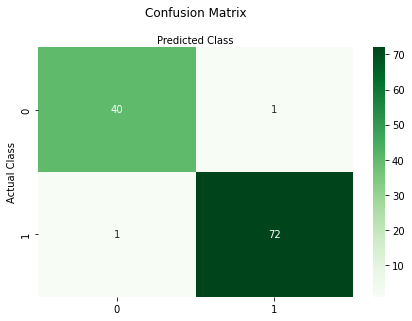

In [9]:
#Analyze using the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
classes = ['Not Diabetes','Diabetes']
figure, axis = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
sns.heatmap(pd.DataFrame(confusion_matrix(yv, p)), annot=True, cmap="Greens", fmt='g')
axis.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class');


In [10]:
#Reevaluate using a variety of weight penalties
lambdas = np.logspace(-2,2,num=400)
acc_log = []
prc_log = []
rec_log = []
for lam in lambdas:
    model = LogisticRegression(penalty='l1',C=lam,solver='liblinear',random_state=1337)
    model.fit(xt,yt)
    p = model.predict(xv)
    rec_log.append(metrics.recall_score(yv,p))
    prc_log.append(metrics.precision_score(yv,p))
    acc_log.append(metrics.accuracy_score(yv,p))
    

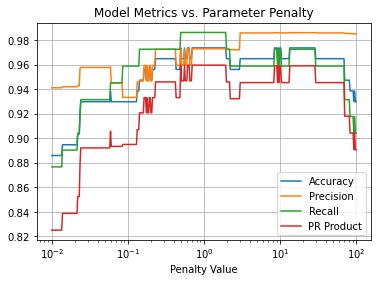

In [11]:
#Plot the results
plt.semilogx(lambdas,acc_log,label='Accuracy')
plt.semilogx(lambdas,prc_log,label='Precision')
plt.semilogx(lambdas,rec_log,label='Recall')
PRval = np.multiply(prc_log,rec_log)
plt.semilogx(lambdas,PRval,label='PR Product')
plt.grid()
plt.xlabel('Penalty Value')
plt.title('Model Metrics vs. Parameter Penalty')
plt.legend();


Model Accuracy:  97.368%
Model Precision: 97.297%
Model Recall:    98.630%


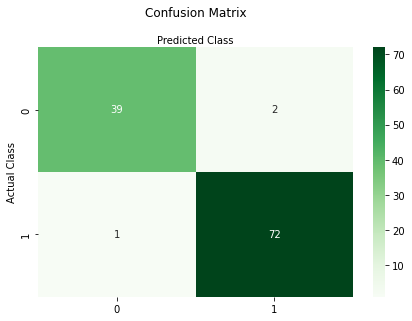

In [12]:
#According to the plot, lambda = 1 is about the best it gets
model = LogisticRegression(penalty='l1',C=1,solver='liblinear',random_state=1337)
model.fit(xt,yt)
p = model.predict(xv)
print("Model Accuracy:  {:.3f}%".format(metrics.accuracy_score(yv,p)*100))
print("Model Precision: {:.3f}%".format(metrics.precision_score(yv,p)*100))
print("Model Recall:    {:.3f}%".format(metrics.recall_score(yv,p)*100))
classes = ['Not Diabetes','Diabetes']
figure, axis = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
sns.heatmap(pd.DataFrame(confusion_matrix(yv, p)), annot=True, cmap="Greens", fmt='g')
axis.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class');
